In [1]:
import sys
%matplotlib inline
import pylab as plb
from tqdm import tqdm
import numpy as np
import mountaincar
from IPython.display import Image
from matplotlib import pyplot as plt
import gc, pickle, json, itertools
from sarsa_agent import *
from multiprocessing import Pool
import json

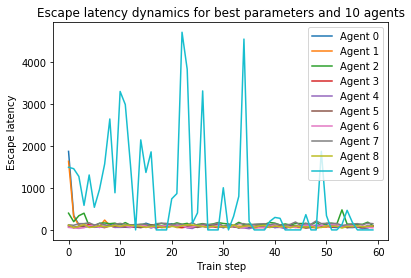

In [2]:
num_agents = 10
results_weights0 = pickle.load(open('results_weights0.p', 'rb'))
plt.figure()
plt.xlabel('Train step')
plt.ylabel('Escape latency')
plt.title('Escape latency dynamics for best parameters and ' + str(num_agents) + ' agents')
# plotting all learning curves
for i, agent in enumerate(results_weights0.values()):
    plt.plot(agent.escape_latency, label = 'Agent ' + str(i))
plt.legend()
plt.show()

In [3]:
results_weights1 = pickle.load(open('results_weights1.p', 'rb'))

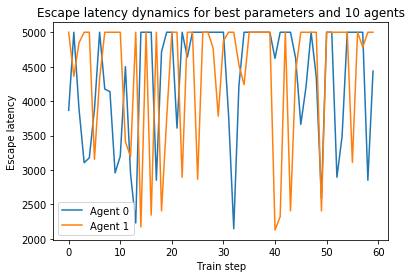

In [4]:
plt.figure()
plt.xlabel('Train step')
plt.ylabel('Escape latency')
plt.title('Escape latency dynamics for best parameters and ' + str(num_agents) + ' agents')
# plotting all learning curves
agents_subset = [list(results_weights1.values())[x] for x in [0,1]]
for i, agent in enumerate(agents_subset):
    y = np.copy(agent.escape_latency)
    y = [x if x > 0 else 5000 for x in y]
    plt.plot(y, label = 'Agent ' + str(i))
plt.legend()
plt.show()

In [5]:
# all weights are greater than 1!
np.sum([[w < 1 for w in agent.w_history] for agent in results_weights1.values()])

0

In [6]:
subset = [0, 1, 5, 9]
agents_subset = [list(results_weights1.values())[x] for x in subset]
gifs = [draw_Q_map_gif(agent, '$w_0=1$, agent %d' % i) for i, agent in zip(subset, agents_subset)]

100%|██████████| 61/61 [05:24<00:00,  5.32s/it]


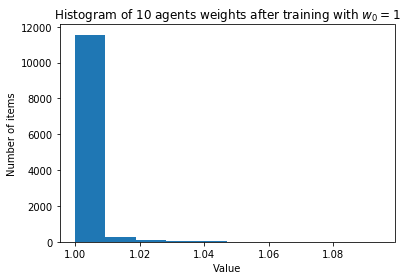

In [13]:
plt.title('Histogram of 10 agents weights after training with $w_0=1$')
plt.xlabel('Value')
plt.ylabel('Number of items')
plt.hist(np.array([agent.w.flatten() for agent in results_weights1.values()]).flatten())
plt.show()

In [19]:
res = []
for agent in results_weights1.values():
    res += list(agent.get_Q_matrix()[1].flatten())
res = np.array(res).flatten()

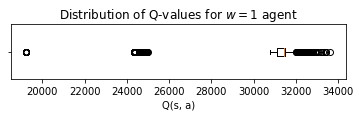

In [20]:
plt.figure(figsize = (6, 1))
plt.title('Distribution of Q-values for $w=1$ agent')
plt.xlabel('Q(s, a)')
plt.boxplot(np.array(res) / 1e-4, vert = False, labels = [""])
plt.show()

Need to increase tau by $\frac{3.2}{50\times 10^{-4}}\approx 600$

## Here is the correct version with bigger $\tau=10^{-4}\times 600=0.06$

In [14]:
def get_agent_for_seed(seed):
    ''' returns a trained agent for given seed '''
    np.random.seed(seed)
    kw = kwargs.copy()
    kw['use_tqdm'] = False
    return seed, get_agent(**kw)

# number of repetitions
num_agents = 3

# setting some random seed (the results will be the same because seed is used explicitly as a parameter)
np.random.seed(43)

# seeds for each run
seeds = range(num_agents)

# constant arguments with best parameters from grid search
kwargs = {'iterations': 60, 'max_steps': 5000, 'gamma': 0.99, 'tau': 0.06, 'eta': 1e-4, 'lambda_': 0.9999,
                 'w': np.ones((3, 400))}

# parameters N_agent x Eta
parameters = list(seeds)

# resulting map n_agent x weights0 -> agent
results_weights1_ = {}

# parallel loop on 4 cores with progress bar
with Pool(4) as p, tqdm(total = len(parameters)) as pbar:
    # loop over results
    for res in p.imap_unordered(get_agent_for_seed, parameters):
        # saving the key -> value pair
        key, value = res
        results_weights1_[key] = value

        # updating progress
        pbar.update(1)

  0%|          | 0/3 [00:00<?, ?it/s]Process ForkPoolWorker-2:
Process ForkPoolWorker-1:
Process ForkPoolWorker-4:
Process ForkPoolWorker-3:



KeyboardInterrupt: 

In [ ]:
pickle.dump(results_weights1_, open('results_weights1_.p', 'wb'))
#results_weights1_ = pickle.load(open('results_weights1_.p', 'rb'))